In [ ]:
//Install cassandra driver for python to run following commands
//pip install cassandra-driver

In [1]:
from cassandra import ConsistencyLevel
from cassandra.cluster import Cluster, BatchStatement
from cassandra.query import SimpleStatement

In [2]:
import pandas as pd

In [3]:
cluster = Cluster(['localhost'])
session = cluster.connect('textanlyz_space')

In [4]:
count_row = session.execute('select count(*) from txt_anlyz_stats;')

In [5]:
##count total no of records
count_row.one().count

36502

In [6]:
rows = session.execute('select * from txt_anlyz_stats;')

In [7]:
rowsDF = pd.DataFrame(list(rows))

In [8]:
rowsDF.head()

,id,date,formatted_text,sentiment,text_data
0,2052249055,Sat Jun 06 00:06:46 PDT 2009,It's early but it was fun while it lasted dan...,positive,It's early but it was fun while it lasted dan...
1,1999729202,Mon Jun 01 20:43:07 PDT 2009,i can't believe my nicky turkey is all grown u...,negative,i can't believe my nicky turkey is all grown u...
2,1981881032,Sun May 31 10:04:54 PDT 2009,oohhhh twitter......i guess i have to wash clo...,negative,oohhhh twitter......i guess i have to wash clo...
3,1981680777,Sun May 31 09:40:08 PDT 2009,Going to see Doug cause I'm bored. Can't figur...,negative,Going to see Doug cause I'm bored. Can't figur...
4,1995893781,Mon Jun 01 14:12:45 PDT 2009,@SCRUFFYSMOMMY jesssssssica!!! i hope your hea...,positive,@SCRUFFYSMOMMY jesssssssica!!! i hope your hea...


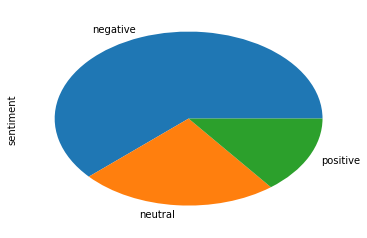

In [10]:
rowsDF['sentiment'].value_counts().plot(kind = 'pie')

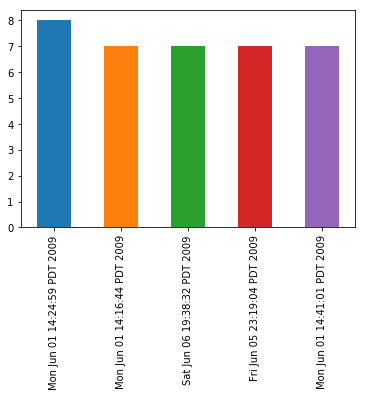

In [11]:
#top 5 days with most tweets
rowsDF['date'].value_counts(sort=True)[:5].plot(kind='bar')

In [12]:
##Every user id associated with only one tweet
rowsDF['id'].unique().size

36502